# Installing Dependencies

In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.4/883.4 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7

In [2]:
pip install transformers

# Importing Modules

In [3]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

#transformer & torch
import torch
from torch.utils.data import TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Loading The Twitter Dataset

In [ ]:
cd "drive/My Drive/Datasets"

[Errno 2] No such file or directory: 'drive/My Drive/Datasets'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filepath = "/content/drive/MyDrive/Datasets/Sentiment140.csv"
dataset = pd.read_csv(filepath, encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])

In [ ]:
dataset.replace({'target':{4:1}}, inplace=True)

In [ ]:
label_map = {0: "NEGATIVE", 1: "POSITIVE"}
def label_sentiment(label):
    return label_map[int(label)]

dataset['target'] = dataset['target'].apply( lambda x: label_sentiment(x))


# Data Preprocessing

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
def preprocess(text, stem=False):
  # Removing the Links , user mentions and special characters
  text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(text))
  text = text.lower()
  text = text.strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['clean_text'] = dataset['text'].apply(lambda x: preprocess(x))

# Splitting the Data into Training Set and Test Set

In [ ]:
selected_columns = ['clean_text', 'target']
new_dataset = dataset[selected_columns].iloc[790000:810001]

Text(0.5, 1.0, 'Dataset labels distribuition')

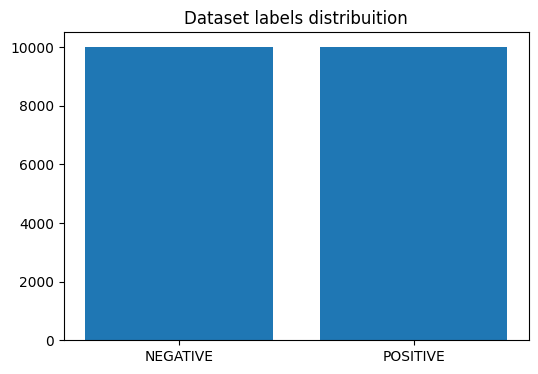

In [ ]:
value_counter = Counter(new_dataset['target'])
plt.figure(figsize=(6,4))
plt.bar(value_counter.keys(), value_counter.values())
plt.title("Dataset labels distribuition")

In [ ]:
X = new_dataset['clean_text'].values
y = new_dataset['target'].values

In [ ]:
X

array(['dinner parents downstairs dining room started watching baba ramdev yoga thingy back room',
       'blah 5am still daang got deep problems',
       'would suggest avoiding 360 living goodness try contacting scott mkcc mkccrenovations 905 303 9009',
       ..., 'new day new track',
       'okay need competition see whether dodgiest cantonese bet win',
       'noooooooo wish saw advertised lmao going one'], dtype=object)

In [ ]:
print(y)

['NEGATIVE' 'NEGATIVE' 'NEGATIVE' ... 'POSITIVE' 'POSITIVE' 'POSITIVE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train)

['cant keep long im taking half day work likely friday cuz bitches cant stick word'
 'hehehehehehe yknow wanted tell missed saw log shy haha'
 'saw earlier darker sights sounds subscribe blog google reader yummmminesssssss'
 ... 'maybe jordan could help answer idea'
 'squarespace trackle sad got called work make day'
 'hopefully stop getting studio time although could always terry wogan broadcast car']


In [ ]:
print(X_test)

['horrible self fulfilling slump experts say dont exist wanna bet nevermind lose taking hiatus days'
 'talking gagov candidate hour time figure exactly questions want ask sooo many enough time'
 'revolution 2 4 1 vouchers last 9 never 9 ruddy expensive' ...
 'bad mascara tears gone black'
 'another bright sunny day island must driftered south last days oh well time eat work'
 'haha nice one mantlepiece']


In [ ]:
print(y_train)

['NEGATIVE' 'NEGATIVE' 'POSITIVE' ... 'POSITIVE' 'NEGATIVE' 'POSITIVE']


In [ ]:
print(y_test)

['POSITIVE' 'NEGATIVE' 'NEGATIVE' ... 'NEGATIVE' 'POSITIVE' 'POSITIVE']


# Tokenizing the data

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Label Encoding

In [ ]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Converting to Tensors

In [ ]:
X_train_dataset = TensorDataset(X_train_encodings['input_ids'], X_train_encodings['attention_mask'], torch.tensor(y_train))
X_test_dataset = TensorDataset(X_test_encodings['input_ids'], X_test_encodings['attention_mask'], torch.tensor(y_test))

# Data Loader

In [ ]:
X_train_loader = DataLoader(X_train_dataset, batch_size=16, shuffle=True)
X_test_loader = DataLoader(X_test_dataset, batch_size=64, shuffle=False)

# Instantiating Model and Optimizer

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
optimizer = AdamW(model.parameters(), lr=5e-5)

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Training the Model

In [ ]:
torch.cuda.is_available()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
def train_epoch(model, dataloader, optimizer):
    model.train()
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader)

# Evaluating the Model

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    total_correct = 0
    total_count = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = outputs.logits.argmax(dim=-1)
            total_correct += (predictions == labels).sum().item()
            total_count += labels.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    accuracy = total_correct / total_count
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='binary')
    return accuracy, precision, recall, f1

# Train and evaluate the model
num_epochs = 3

for epoch in range(num_epochs):
    train_loss = train_epoch(model, X_train_loader, optimizer)
    test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test_loader)
    print(f'Epoch {epoch + 1}, Train Loss: {train_loss}, Test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')

Epoch 1, Train Loss: 0.5789048293828964, Test Accuracy: 32.02599350162459, Precision: 0.726628895184136, Recall: 0.7768803634528016, F1 Score: 0.750914857282264
Epoch 2, Train Loss: 0.4786576967537403, Test Accuracy: 32.07498125468633, Precision: 0.7971014492753623, Recall: 0.6940938919737506, F1 Score: 0.7420399352401512
Epoch 3, Train Loss: 0.38239672116190193, Test Accuracy: 32.0722319420145, Precision: 0.7531359759157049, Recall: 0.7576981322564361, F1 Score: 0.7554101660795167


# Predicting the Sentiments
## 5 being highly positive to 1 being negative



In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [5]:
#predict1
tokens = tokenizer.encode('Meh It was okay',return_tensors='pt')
result = model(tokens)
result.logits

tensor([[-0.5811,  2.0217,  3.0299, -0.6248, -3.1651]],
       grad_fn=<AddmmBackward0>)

In [6]:
int(torch.argmax(result.logits))+1

3

In [7]:
#predict2
tokens = tokenizer.encode('This is the worst day ever! Everything is going wrong. 😡 #worstday #fail #angry',return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

1

In [8]:
#predict3
tokens = tokenizer.encode('Feeling a bit down today. Need a pick-me-up. 😔 #notfeelingit #blah',return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

2

In [9]:
#predict4
tokens = tokenizer.encode('Neutral about this whole situation. Not sure how to feel. 🤔 #neutral #indifferent',return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

2

In [10]:
#predict5
tokens = tokenizer.encode('Had a fantastic day! So grateful for everything. 😊 #blessed #happy #goodvibes',return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

5